### Обработка текста

In [56]:
collection = []
with open('collection.txt', 'r', encoding='utf-8') as file:
    for line in file:
        if not line.startswith('['):
            if not line.startswith('\n'):
                line = line.replace('\n', '')
                collection.append(line)

print(collection)

['Будет солнечно', 'Солнечно до конца дня. В Красносельском районе как всегда ветер', 'Сегодня будет солнечно, ясное небо, ни облачка не появится. Ночь чистая, можно будет даже звёзды увидеть', 'Температура опустится сразу на 6-7 градусов, так что на улице днем будет не выше плюс 13. Ощущение холода будут усиливать дожди, которые начнутся в последний день этой недели и затем будут идти несколько суток', 'Сегодня ясно, без осадков. Атмосферное давление выше нормы.', 'Сегодня довольно теплая для сентября погода. Небо ясное и осадков не ожидается. Так что прогноз на сегодня очень приятный.', 'В Санкт-Петербурге сегодня ожидается +20..+18 °C, без осадков, легкий ветер.', 'Трудно с ходу назвать фильм, который породил столько же абсурдных пародий. Данное творение несмотря на свою «трешовость», снискал огромное количество поклонников', 'Трагикомедия, которая показывает последние дни двух молодых людей со смертельными диагнозами', 'Фильм явно тянет на премию Оскар, проработанный сюжет, очень к

### Лемматизация (SpaCy)

In [57]:
import spacy
from string import punctuation
from spacy.lang.ru import stop_words

nlp = spacy.load('ru_core_news_sm')

stop_words = stop_words.STOP_WORDS
punctuations = list(punctuation)

token_collection= []
vector = []

lemmatized_collection = [[token.lemma_.lower() for token in nlp(text) if token.lemma_.lower() not in stop_words and token.lemma_.lower() not in punctuations and not token.pos_ == 'PUNCT'] for text in collection]

lemmatized_collection_POS = [[{token.lemma_.lower(): token.pos_} for token in nlp(text) if token.lemma_.lower() not in stop_words and token.lemma_.lower() not in punctuations and not token.pos_ == 'PUNCT'] for text in collection]

print(lemmatized_collection)
print(lemmatized_collection_POS)

# for i in range(len(collection)):
#     doc = nlp(collection[i])
#     token_collection.append([])
#     vector.append(doc.vector)
#     for token in doc:
#         word = token.lemma_.lower()
#         if (word not in stop_words and word not in punctuations):
#             token_collection[i].append(word)
            

# print(token_collection)
# print(vector)

# verbs = [[token.lemma_.lower() for token in nlp(text) if token.pos_ == 'VERB'] for text in collection]
# nouns = [[token.lemma_.lower() for token in nlp(text) if token.pos_ == 'NOUN'] for text in collection]
# print(verbs)
# print(nouns)

[['солнечный'], ['солнечно', 'конец', 'день', 'красносельский', 'район', 'ветер'], ['сегодня', 'солнечный', 'ясный', 'небо', 'ни', 'облачка', 'появиться', 'ночь', 'чистый', 'звёзды', 'увидеть'], ['температура', 'опуститься', '6', '7', 'градус', 'улица', 'день', 'высоко', 'плюс', '13', 'ощущение', 'холод', 'усиливать', 'дождь', 'начаться', 'последний', 'день', 'неделя', 'идти', 'суток'], ['сегодня', 'ясный', 'осадок', 'атмосферный', 'давление', 'высоко', 'норма'], ['сегодня', 'тёплый', 'сентябрь', 'погода', 'небо', 'ясный', 'осадок', 'ожидаться', 'прогноз', 'сегодня', 'приятный'], ['санкт', 'петербург', 'сегодня', 'ожидаться', '+20', '+18', '°', 'c', 'осадок', 'лёгкий', 'ветер'], ['трудный', 'ход', 'назвать', 'фильм', 'породить', 'столько', 'абсурдный', 'пародия', 'творение', 'несмотря', 'трешовость', 'снискал', 'огромный', 'количество', 'поклонник'], ['трагикомедия', 'показывать', 'последний', 'день', 'два', 'молодой', 'человек', 'смертельный', 'диагноз'], ['фильм', 'тянуть', 'премия',

In [58]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import euclidean_distances, cosine_distances
from sklearn.metrics import DistanceMetric
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score, v_measure_score, homogeneity_score
import numpy as np

In [146]:
joined_lemm_collection = [' '.join(text) for text in lemmatized_collection]

joined_nouns_collection = [' '.join(text) for text in [
    [list(token.keys())[0] for token in lemmatized_text if list(token.values())[0] == "NOUN"]
    for lemmatized_text in lemmatized_collection_POS
]]

joined_adj_nouns_collection = [' '.join(text) for text in [
    [list(token.keys())[0] for token in lemmatized_text if list(token.values())[0] == "NOUN" or list(token.values())[0] == "ADJ"]
    for lemmatized_text in lemmatized_collection_POS
]]

In [147]:
print(joined_lemm_collection)
print(joined_nouns_collection)
print(joined_adj_nouns_collection)

['солнечный', 'солнечно конец день красносельский район ветер', 'сегодня солнечный ясный небо ни облачка появиться ночь чистый звёзды увидеть', 'температура опуститься 6 7 градус улица день высоко плюс 13 ощущение холод усиливать дождь начаться последний день неделя идти суток', 'сегодня ясный осадок атмосферный давление высоко норма', 'сегодня тёплый сентябрь погода небо ясный осадок ожидаться прогноз сегодня приятный', 'санкт петербург сегодня ожидаться +20 +18 ° c осадок лёгкий ветер', 'трудный ход назвать фильм породить столько абсурдный пародия творение несмотря трешовость снискал огромный количество поклонник', 'трагикомедия показывать последний день два молодой человек смертельный диагноз', 'фильм тянуть премия оскар проработанный сюжет красивый завораживать картинка верить умереть конец фильм', 'просмотр фильм друг повторять легендарный фраза главный герой водка внутри снаружи бутылка вонна плей лэтс плей забывать делать губа бантик', 'ковёр задавать стиль комната']
['', 'конец

In [148]:
vectorizer = TfidfVectorizer()

vectors = vectorizer.fit_transform(joined_lemm_collection)
vectors_adj_nouns = vectorizer.fit_transform(joined_adj_nouns_collection)
vectors_nouns = vectorizer.fit_transform(joined_nouns_collection)

euclidean_distance_matrix = euclidean_distances(vectors)
euclidean_distance_matrix_adj_nouns = euclidean_distances(vectors_adj_nouns)
euclidean_distance_matrix_nouns = euclidean_distances(vectors_nouns)

cosine_distance_matrix = cosine_distances(vectors)
cosine_distance_matrix_adj_nouns = cosine_distances(vectors_adj_nouns)
cosine_distance_matrix_nouns = cosine_distances(vectors_nouns)

jaccard_similarity_matrix = DistanceMetric.get_metric('jaccard').pairwise(vectors)
jaccard_similarity_matrix_adj_nouns = DistanceMetric.get_metric('jaccard').pairwise(vectors_adj_nouns)
jaccard_similarity_matrix_nouns = DistanceMetric.get_metric('jaccard').pairwise(vectors_nouns)

In [149]:
true_labels = [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
n_clusters = 2
n_iterations = 50
matrixes = [euclidean_distance_matrix, cosine_distance_matrix, jaccard_similarity_matrix]
matrixes_adj_nouns = [euclidean_distance_matrix_adj_nouns, cosine_distance_matrix_adj_nouns, jaccard_similarity_matrix_adj_nouns]
matrixes_nouns = [euclidean_distance_matrix_nouns, cosine_distance_matrix_nouns, jaccard_similarity_matrix_nouns]
metrics = [normalized_mutual_info_score, adjusted_rand_score, v_measure_score, homogeneity_score]

In [155]:

def cluster_kmeans(matrix, metrics, true_labels, n_iterations, n_clusters):
    scores = {}
    result = []
    for metric in metrics:
        scores.update({metric.__name__: []})


    for i in range(n_iterations):
        clusters = KMeans(n_clusters=n_clusters, n_init=10)
        clusters.fit(matrix)

        for metric in metrics:
            score = metric(true_labels, clusters.labels_)
            scores[metric.__name__].append(score)


    for metric in scores:
        max = np.max(scores[metric])
        min = np.min(scores[metric])
        avg = np.mean(scores[metric])

        result.append(f'{metric}\nMax: {max} iter: {scores[metric].index(max) + 1}\nMin: {min} iter: {scores[metric].index(min) + 1}\nAvg: {avg}\n')
        # print(metric)
        # print(f'Max: {max} iter: {scores[metric].index(max) + 1}')
        # print(f'Min: {min} iter: {scores[metric].index(min) + 1}')
        # print(f'Avg: {avg}')
    return '\n'.join(result)

In [108]:
print(cluster_kmeans(matrixes[0], metrics, true_labels, n_iterations, n_clusters))

normalized_mutual_info_score
Max: 0.48616894363355745 iter: 1
Min: 0.36201225441690177 iter: 6
Avg: 0.46133760579022626
adjusted_rand_score
Max: 0.391705069124424 iter: 1
Min: 0.18331805682859761 iter: 6
Avg: 0.3500276666652587
v_measure_score
Max: 0.48616894363355745 iter: 1
Min: 0.3620122544169018 iter: 6
Avg: 0.46133760579022626
homogeneity_score
Max: 0.48616894363355745 iter: 1
Min: 0.35063820438777576 iter: 6
Avg: 0.4590627957844011


In [156]:
from tabulate import tabulate

headers = ['words', 'euclidean', 'cosine', 'jaccard']

arr = [['all words'], ['adj and nouns'], ['nouns']]

for matrix in matrixes:
    arr[0].append(cluster_kmeans(matrix, metrics, true_labels, n_iterations, n_clusters))
for matrix in matrixes_adj_nouns:
    arr[1].append(cluster_kmeans(matrix, metrics, true_labels, n_iterations, n_clusters))
for matrix in matrixes_nouns:
    arr[2].append(cluster_kmeans(matrix, metrics, true_labels, n_iterations, n_clusters))

print(tabulate(arr, headers, tablefmt='grid'))

+---------------+----------------------------------+-----------------------------------+-----------------------------------+
| words         | euclidean                        | cosine                            | jaccard                           |
+===============+==================================+===================================+===================================+
| all words     | normalized_mutual_info_score     | normalized_mutual_info_score      | normalized_mutual_info_score      |
|               | Max: 0.48616894363355745 iter: 1 | Max: 0.48616894363355745 iter: 1  | Max: 0.26414551957441684 iter: 1  |
|               | Min: 0.36201225441690177 iter: 3 | Min: 0.36201225441690177 iter: 8  | Min: 0.26414551957441684 iter: 1  |
|               | Avg: 0.46382073957455944         | Avg: 0.46382073957455944          | Avg: 0.26414551957441684          |
|               |                                  |                                   |                                   |


In [170]:
# import matplotlib.pyplot as plt
# from scipy.cluster.hierarchy import dendrogram

def cluster_hierarchy(matrix, metrics, true_labels, num_clusters):
    linkages = ["complete", "average", "single"]
    result = []

    if matrix.shape[0] != matrix.shape[1]:
        affinity = "euclidean"
        matrix = matrix.toarray()
        linkages.append("ward")
    else:
        affinity = "precomputed"

    for linkage in linkages:
        result.append('\n')
        result.append(linkage)
        result.append('---------')
        # print(linkage)
        agg_clustering = AgglomerativeClustering(n_clusters=num_clusters, metric=affinity, linkage=linkage)

        agg_clustering.fit(matrix)

        for metric in metrics:
            score = metric(true_labels, agg_clustering.labels_)
            result.append(f"{metric.__name__}: {score}")
            # print(f"{metric.__name__}: ", score)

        # plt.figure(figsize=[12, 12])
        # plt.subplot(4, 1, linkages.index(linkage) + 1)
        # children = agg_clustering.children_
        # distance = np.arange(children.shape[0])
        # num_of_observations = np.arange(2, children.shape[0] + 2)
        # linkage_matrix = np.column_stack([children, distance, num_of_observations]).astype(float)
        # dendrogram(linkage_matrix)

    return '\n'.join(result)

    # plt.show()
        

complete

normalized_mutual_info_score:  0.3011976225492563

adjusted_rand_score:  0.20089686098654708

v_measure_score:  0.30119762254925636

homogeneity_score:  0.2505026028157114
average

normalized_mutual_info_score:  0.16217929907568504

adjusted_rand_score:  0.06796116504854369

v_measure_score:  0.16217929907568504

homogeneity_score:  0.11533532084453771
single

normalized_mutual_info_score:  0.16217929907568504

adjusted_rand_score:  0.06796116504854369

v_measure_score:  0.16217929907568504

homogeneity_score:  0.11533532084453771


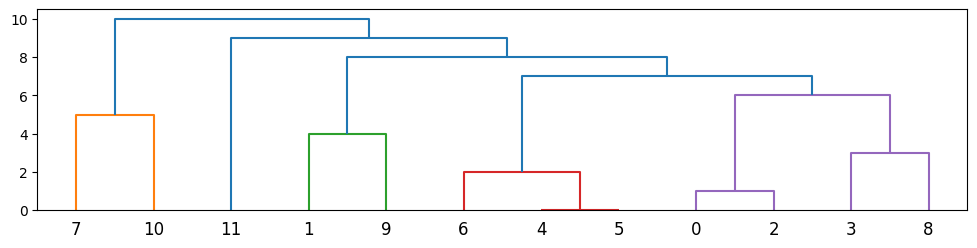

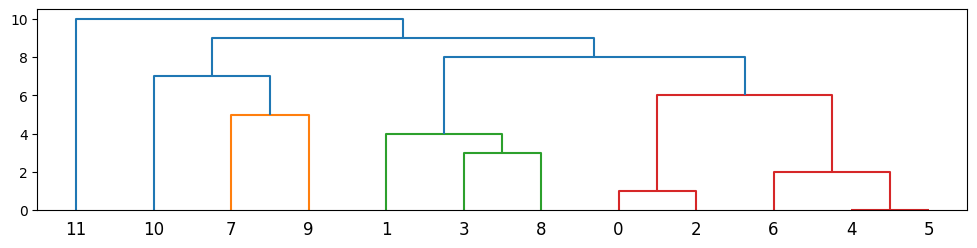

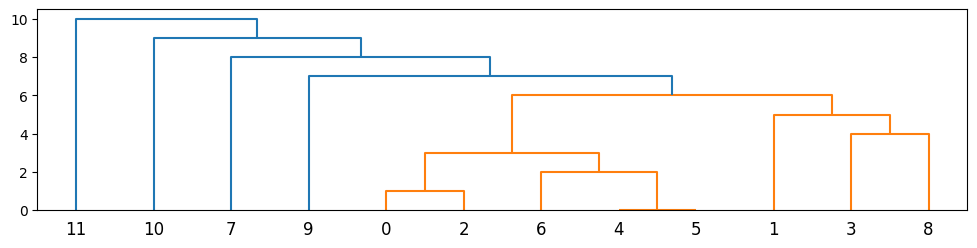

In [154]:
cluster_hierarchy(matrixes[0], metrics, true_labels, n_clusters)

In [171]:
headers = ['words', 'euclidean', 'cosine', 'jaccard']

arr = [['all words'], ['adj and nouns'], ['nouns']]

for matrix in matrixes:
    arr[0].append(cluster_hierarchy(matrix, metrics, true_labels, n_clusters))
for matrix in matrixes_adj_nouns:
    arr[1].append(cluster_hierarchy(matrix, metrics, true_labels, n_clusters))
for matrix in matrixes_nouns:
    arr[2].append(cluster_hierarchy(matrix, metrics, true_labels, n_clusters))

print(tabulate(arr, headers, tablefmt='grid'))

+---------------+---------------------------------------------------+---------------------------------------------------+---------------------------------------------------+
| words         | euclidean                                         | cosine                                            | jaccard                                           |
+===============+===================================================+===================================================+===================================================+
| all words     | complete                                          | complete                                          | complete                                          |
|               | ---------                                         | ---------                                         | ---------                                         |
|               | normalized_mutual_info_score: 0.3011976225492563  | normalized_mutual_info_score: 0.16217929907568504 | normaliz